In [98]:
import pandas as pd
import math as mt
import seaborn as sns
import unidecode
import matplotlib.pyplot as plt

df = pd.read_csv("frag/events_of_lead.csv",index_col = 0)

In [99]:
df["model"].value_counts()

iPhone 6 Plus                          35
iPhone 6S Plus                         31
Samsung Galaxy J7 Prime                26
iPhone 6S                              21
Motorola Moto G4 Plus                  20
iPhone 8                               20
Motorola Moto G5 Plus                  15
Samsung Galaxy On 7                    15
Samsung Galaxy A9 Pro 2016             15
LG K10 Novo                            12
iPhone 6                               12
Motorola Moto G5S Plus                  9
iPhone 7 Plus                           9
Samsung Galaxy J7 PRO                   8
Lenovo Vibe A7010 Dual Chip             7
iPhone 8 Plus                           7
LG K10 TV                               6
LG K4                                   5
iPhone 7                                5
Motorola Moto G4 Play DTV               5
iPhone SE                               5
iPhone 5s                               5
Motorola Moto G2 3G Dual                5
LG X Power                        

In [100]:
BRS = ["iPhone","Samsung","Galaxy","LG","Motorola","Moto"]
i = 0
def brow(obj) :
    if(pd.isnull(obj)):
        return obj
    if(obj == ""):
        return float("NaN")
    list = obj.split(" ")
    true_list = []
    for word in list:
        if word in BRS:
            true_list.append(word)
    if( len(true_list) == 0):
        #print (' '.join(word for word in list))
        return "Other"
    return ' '.join(word for word in list if word not in true_list)


df["b_v"] = df["model"].apply(brow)

In [101]:

i = 0
def brow(obj) :
    if(pd.isnull(obj)):
        return obj
    if(obj == ""):
        return float("NaN")
    list = obj.split(" ")
    true_list = []
    for word in list:
        if word in BRS:
            true_list.append(word)
    if( len(true_list) == 0):
        #print (' '.join(word for word in list))
        return "Other"
    
    return ' '.join(word for word in true_list)
    
df["browser"] = df["model"].apply(brow)

In [102]:
agraf = df["browser"].value_counts()

Text(0,0.5,'Linea de modelo')

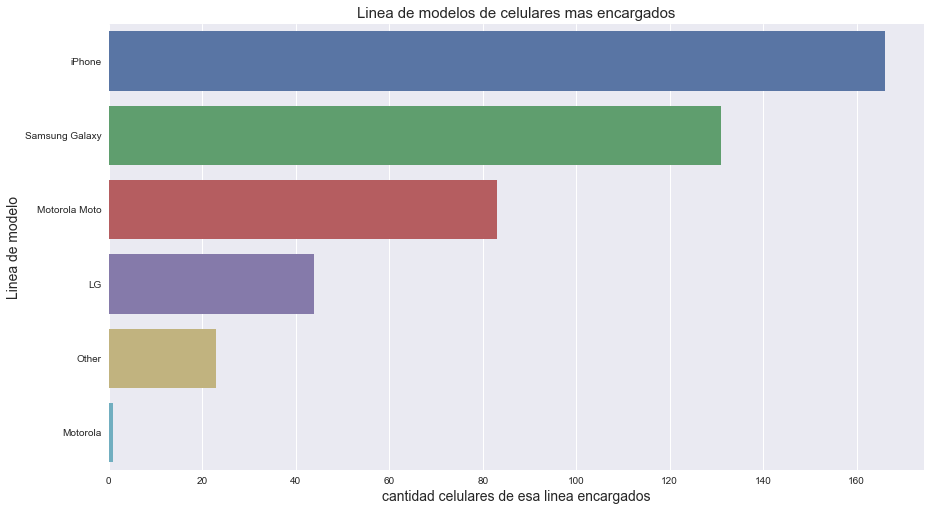

In [103]:

sns.set(rc={'figure.figsize':(14.6,8.2)})
g = sns.barplot(x = agraf.values, y = agraf.index)
g.set_title("Linea de modelos de celulares mas encargados", fontsize=15)
g.set_xlabel("cantidad celulares de esa linea encargados", fontsize=14)
g.set_ylabel("Linea de modelo", fontsize=14)

In [104]:
del agraf["Other"]

In [105]:

l = []
for i in agraf.index:
    l.append(df.loc[df["browser"] == i]["b_v"].nunique())

Text(0,0.5,'Linea de modelo')

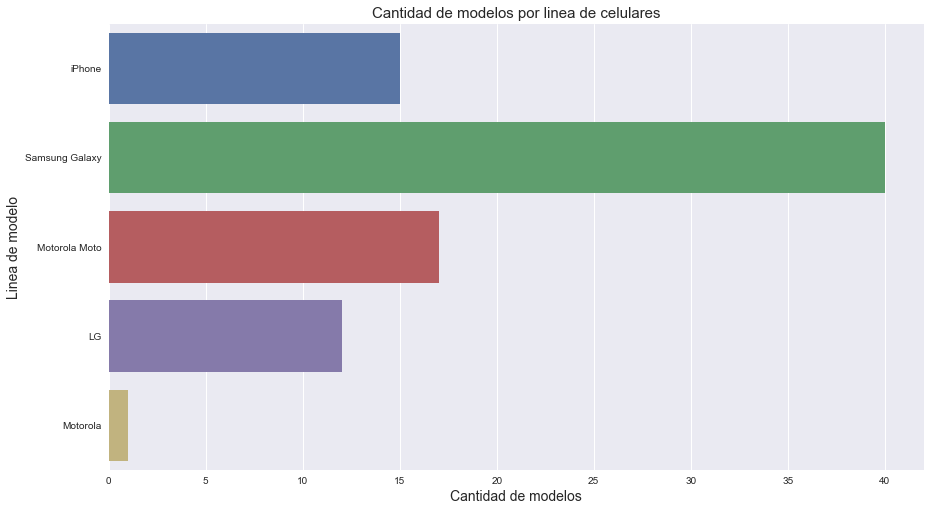

In [106]:

sns.set(rc={'figure.figsize':(14.6,8.2)})
g = sns.barplot(x = l, y = agraf.index)
g.set_title("Cantidad de modelos por linea de celulares", fontsize=15)
g.set_xlabel("Cantidad de modelos", fontsize=14)
g.set_ylabel("Linea de modelo", fontsize=14)

In [107]:
j = 0;
for i in l:
    l[j] = agraf.values[j]/l[j]
    j = j+1

Text(0,0.5,'Linea de celulares')

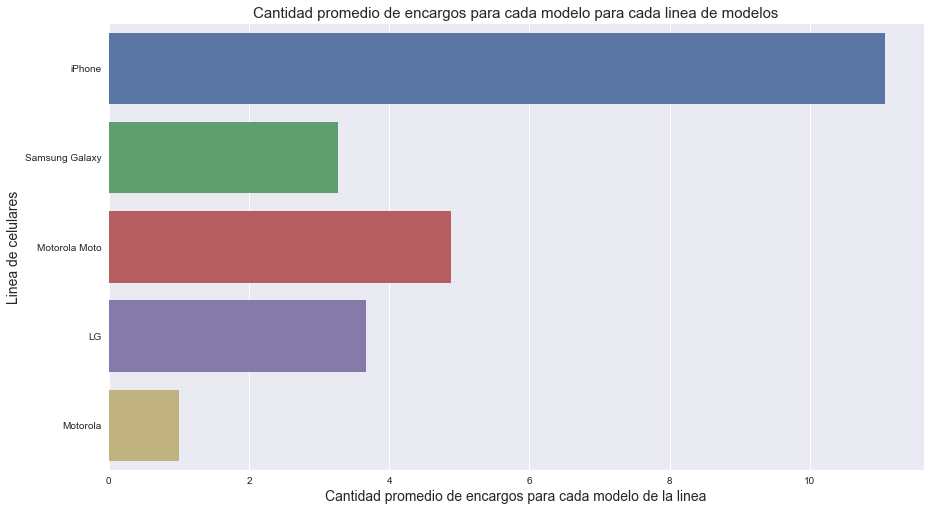

In [109]:

sns.set(rc={'figure.figsize':(14.6,8.2)})
g = sns.barplot(x = l, y = agraf.index)
g.set_title("Cantidad promedio de encargos para cada modelo para cada linea de modelos", fontsize=15)
g.set_xlabel("Cantidad promedio de encargos para cada modelo de la linea", fontsize=14)
g.set_ylabel("Linea de celulares", fontsize=14)